# TITANIC

In [ ]:
# Import the neccessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/titanic.png" width="800">

In [52]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/fav/tecno/titanic.csv

--2023-11-16 17:41:21--  https://frenzy86.s3.eu-west-2.amazonaws.com/fav/tecno/titanic.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 3.5.244.176, 52.95.148.94, 52.95.143.2, ...
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|3.5.244.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10305 (10K) [application/vnd.ms-excel]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  10.06K  --.-KB/s    in 0s      

2023-11-16 17:41:22 (86.0 MB/s) - ‘titanic.csv’ saved [10305/10305]



In [49]:
path = 'https://frenzy86.s3.eu-west-2.amazonaws.com/fav/tecno/titanic.csv'

In [53]:
df = pd.read_csv(path, sep='\t')
#df = pd.read_csv(path,)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S


From a sample of the RMS Titanic data, we can see the various features present for each passenger on the ship:

- Survived: Outcome of survival (0 = No; 1 = Yes)
- Pclass: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- Name: Name of passenger
- Sex: Sex of the passenger
- Age: Age of the passenger (Some entries contain NaN)
- SibSp: Number of siblings and spouses of the passenger aboard
- Parch: Number of parents and children of the passenger aboard
- Ticket: Ticket number of the passenger
- Fare: Fare paid by the passenger
- Cabin Cabin number of the passenger (Some entries contain NaN)
- Embarked: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

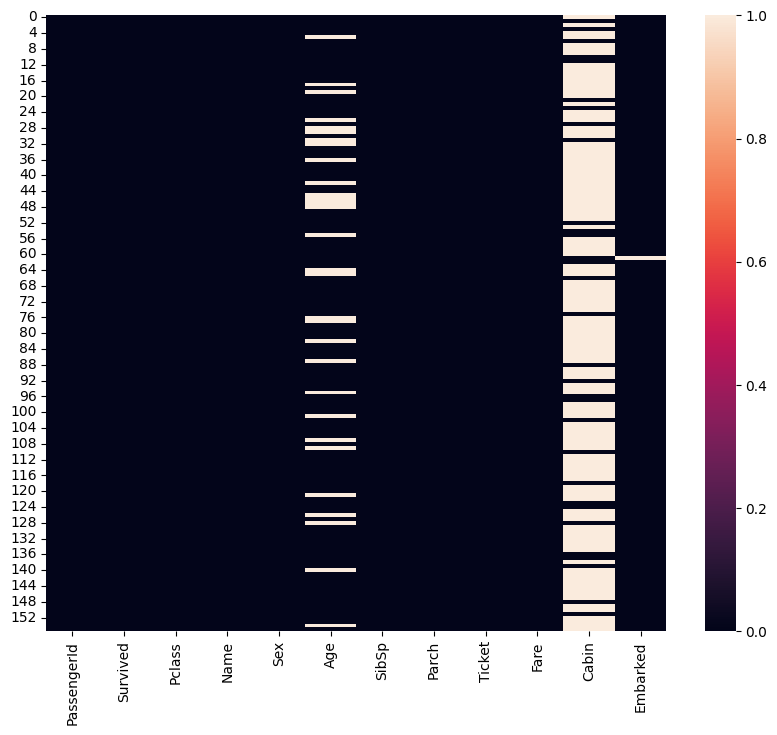

In [54]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull());

In [56]:
# Bilanciamento della target
df['Survived'].value_counts()

0    102
1     54
Name: Survived, dtype: int64

In [57]:
# Drop some columns which is not relevant to the analysis (they are not numeric)
df = df.drop(['Name', 'Ticket', 'Cabin','PassengerId'], axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
151,1,1,female,22.0,1,0,66.6000,S
152,0,3,male,55.5,0,0,8.0500,S
153,0,3,male,40.5,0,2,14.5000,S
154,0,3,male,NaN,0,0,7.3125,S


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  156 non-null    int64  
 1   Pclass    156 non-null    int64  
 2   Sex       156 non-null    object 
 3   Age       126 non-null    float64
 4   SibSp     156 non-null    int64  
 5   Parch     156 non-null    int64  
 6   Fare      156 non-null    float64
 7   Embarked  155 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 9.9+ KB


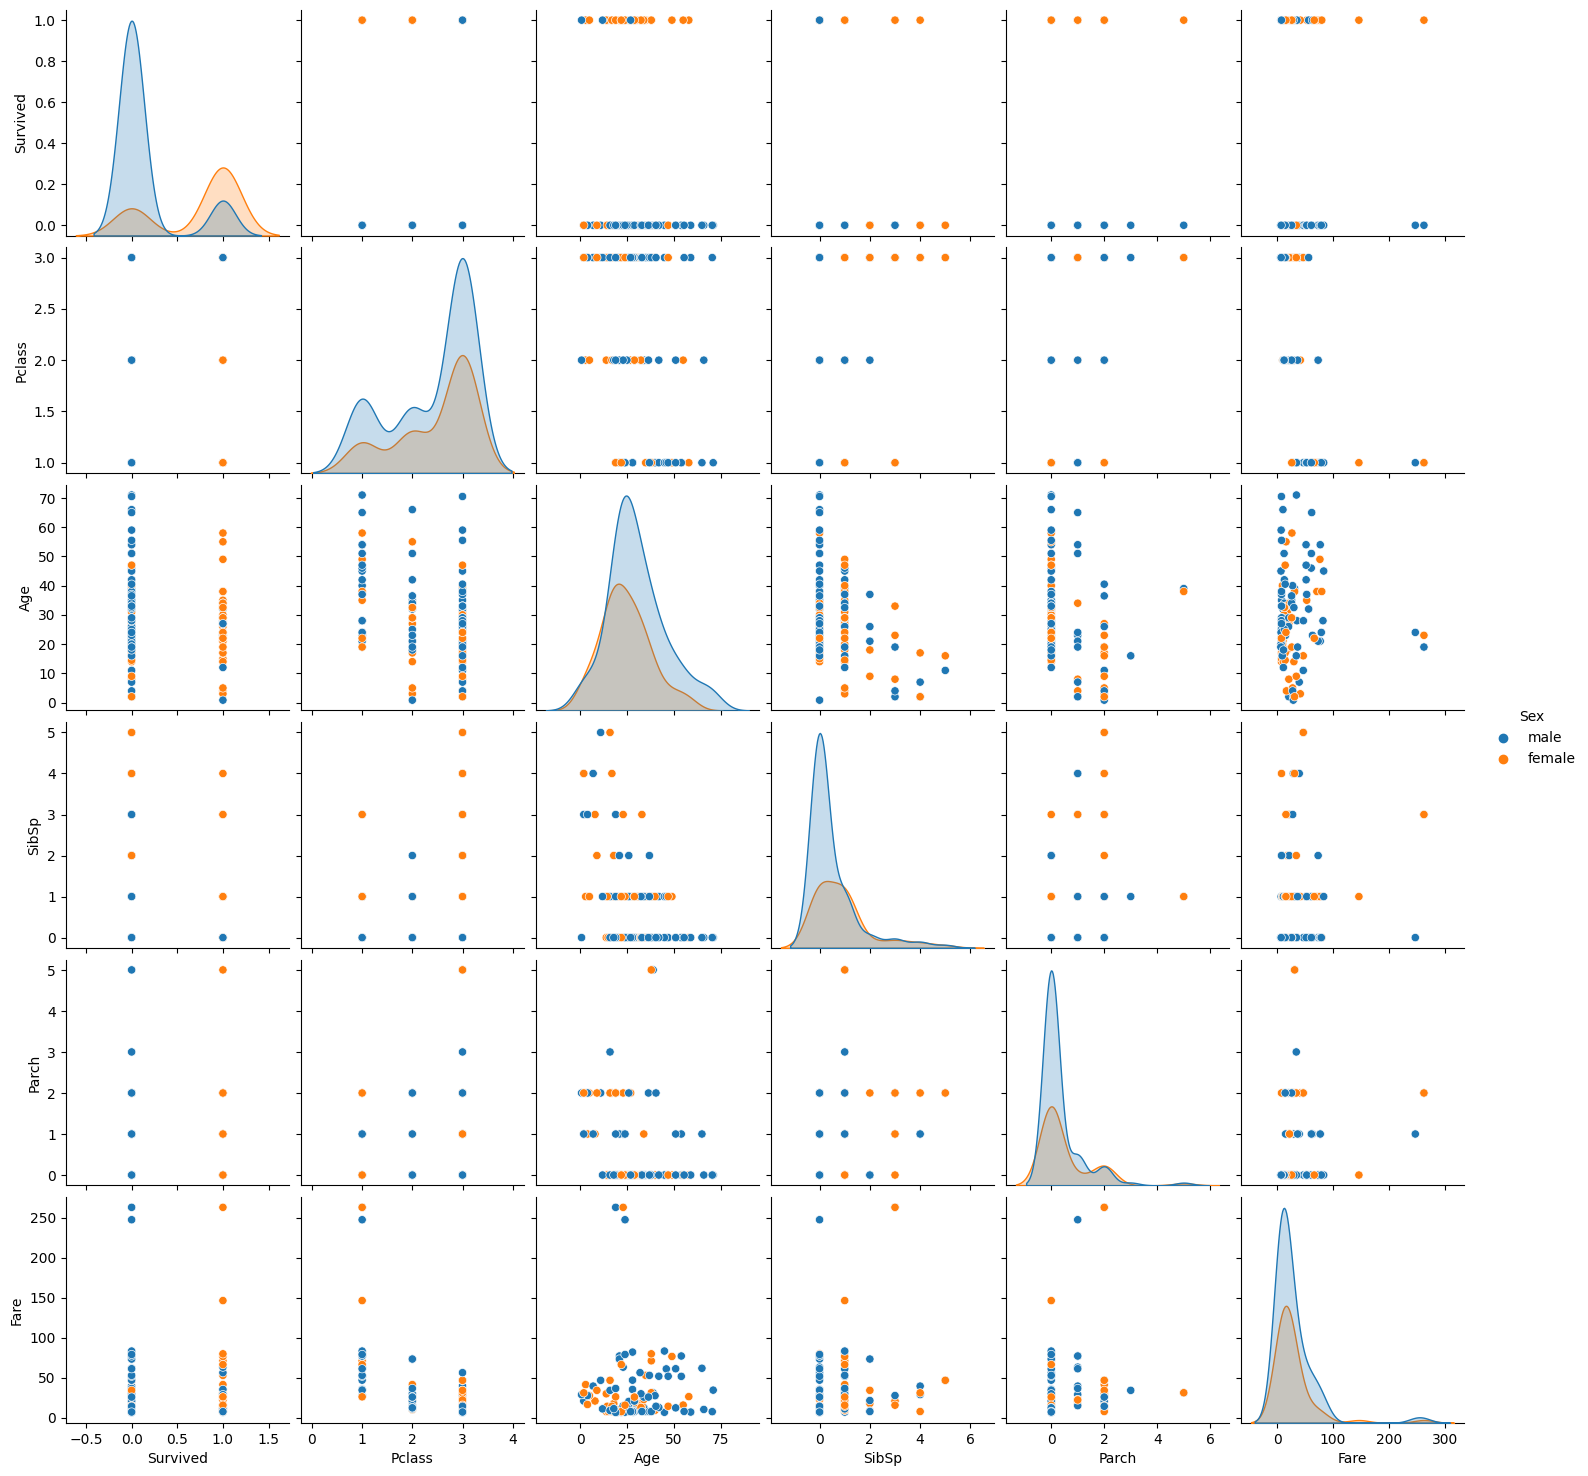

In [59]:
sns.pairplot(df,hue='Sex')

In [60]:
df.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         30
SibSp        0
Parch        0
Fare         0
Embarked     1
dtype: int64

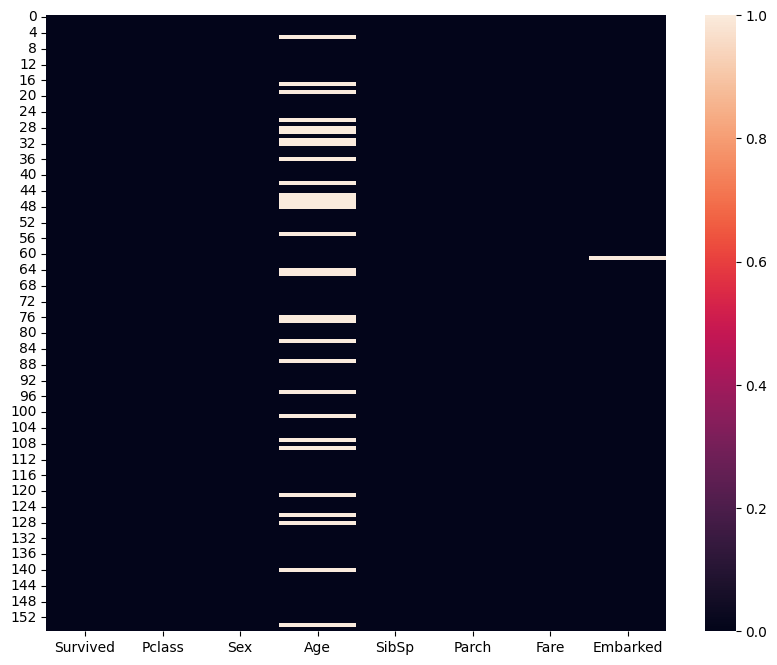

In [61]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull());

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/holes.jpg" width="900">

Interpolate for missing values

This means you can deduce the missing values by interpolating  existing values.

For example, if we have the series 1, 3, 4, ?, 6, 8,….What is the missing value

Simply put, it is midpoint between 4 and 6. So the result it (4+6)/2 = 5

To interpolate missing values for Age, use the code below

In [62]:
# To replace missing values with interpolated values, for example Age
df['Age'] = df['Age'].interpolate()

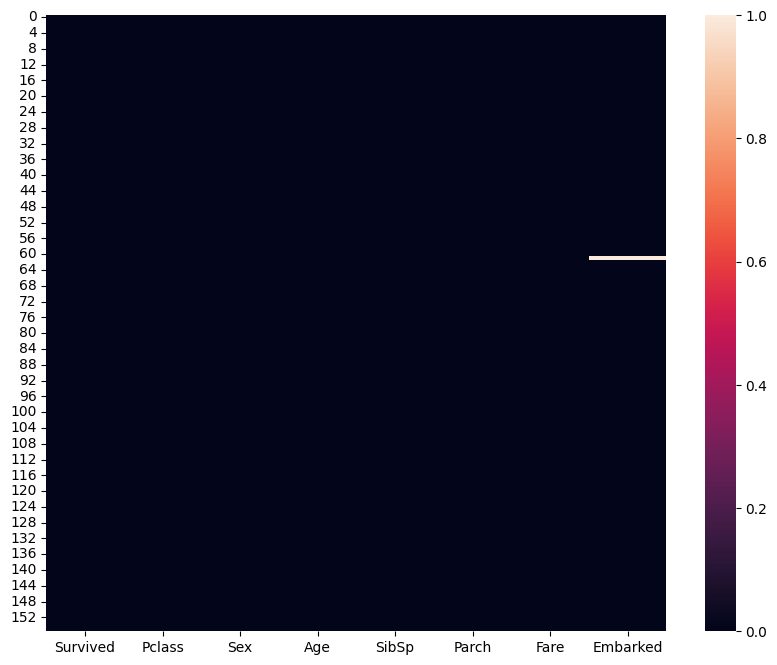

In [63]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull());

In [64]:
df['Embarked'].value_counts()

S    110
C     32
Q     13
Name: Embarked, dtype: int64

In [66]:
# Drop all rows with missin data solo 1 riga
df = df.dropna()

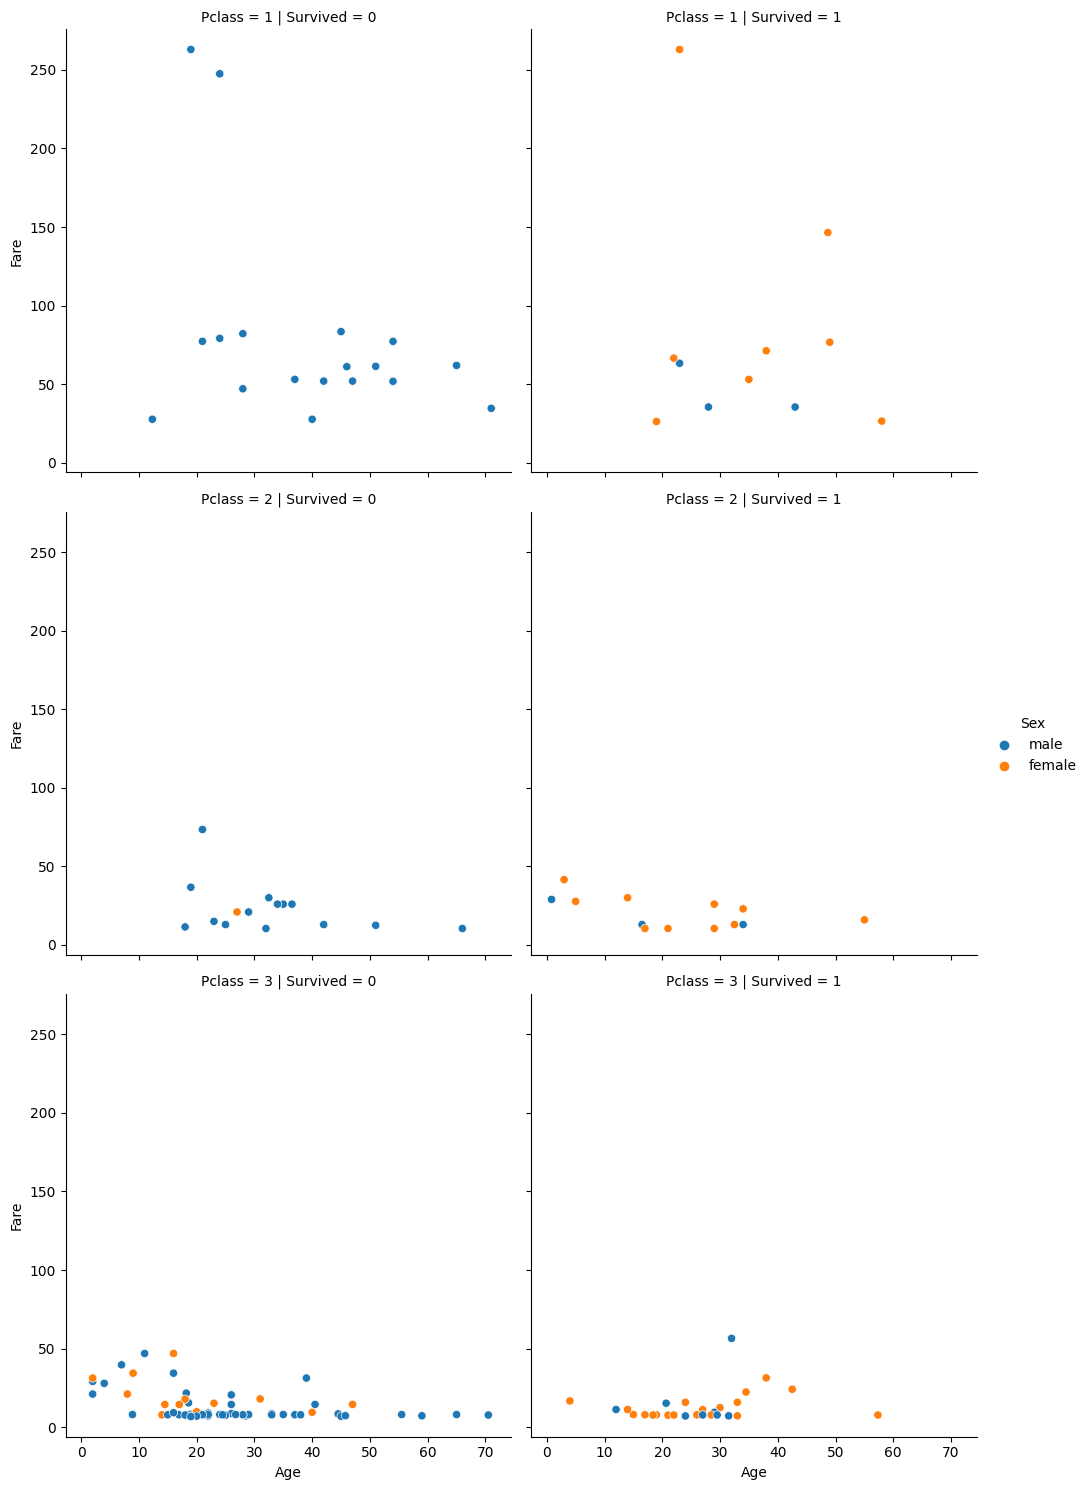

In [67]:
sns.relplot(x="Age", y="Fare", hue="Sex",
                col="Survived", row="Pclass", data=df)

### Convert categorical values to numeric

Now if you view the dataset properties using df.info(), you will see that the Sex and Embarked columns are not numeric. We we now convert them to numeric. There is a separate tutorial on Converting categorical column to numeric here.

This takes three steps:

First create dummy variables from the categorical columns

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 155
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  155 non-null    int64  
 1   Pclass    155 non-null    int64  
 2   Sex       155 non-null    object 
 3   Age       155 non-null    float64
 4   SibSp     155 non-null    int64  
 5   Parch     155 non-null    int64  
 6   Fare      155 non-null    float64
 7   Embarked  155 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 15.0+ KB


<Axes: xlabel='Pclass', ylabel='Density'>

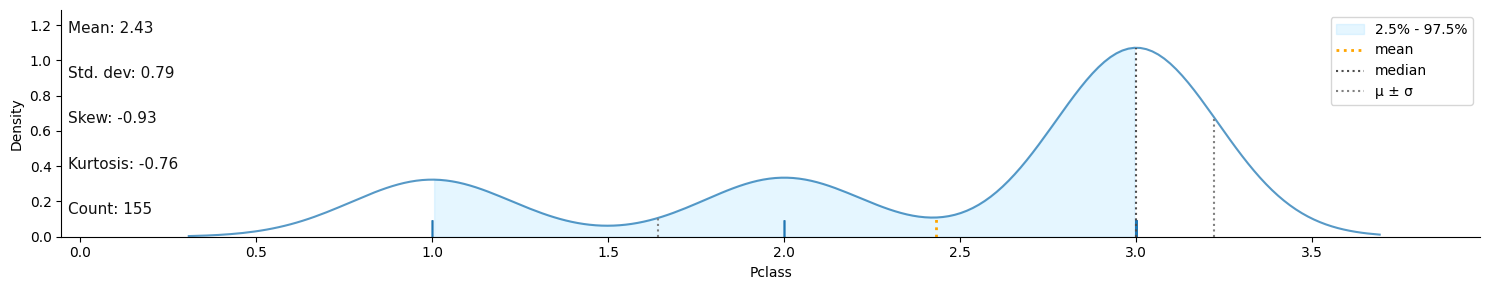

In [ ]:
!pip install klib -q

import klib
klib.dist_plot(df)

GridSpec(6, 2)

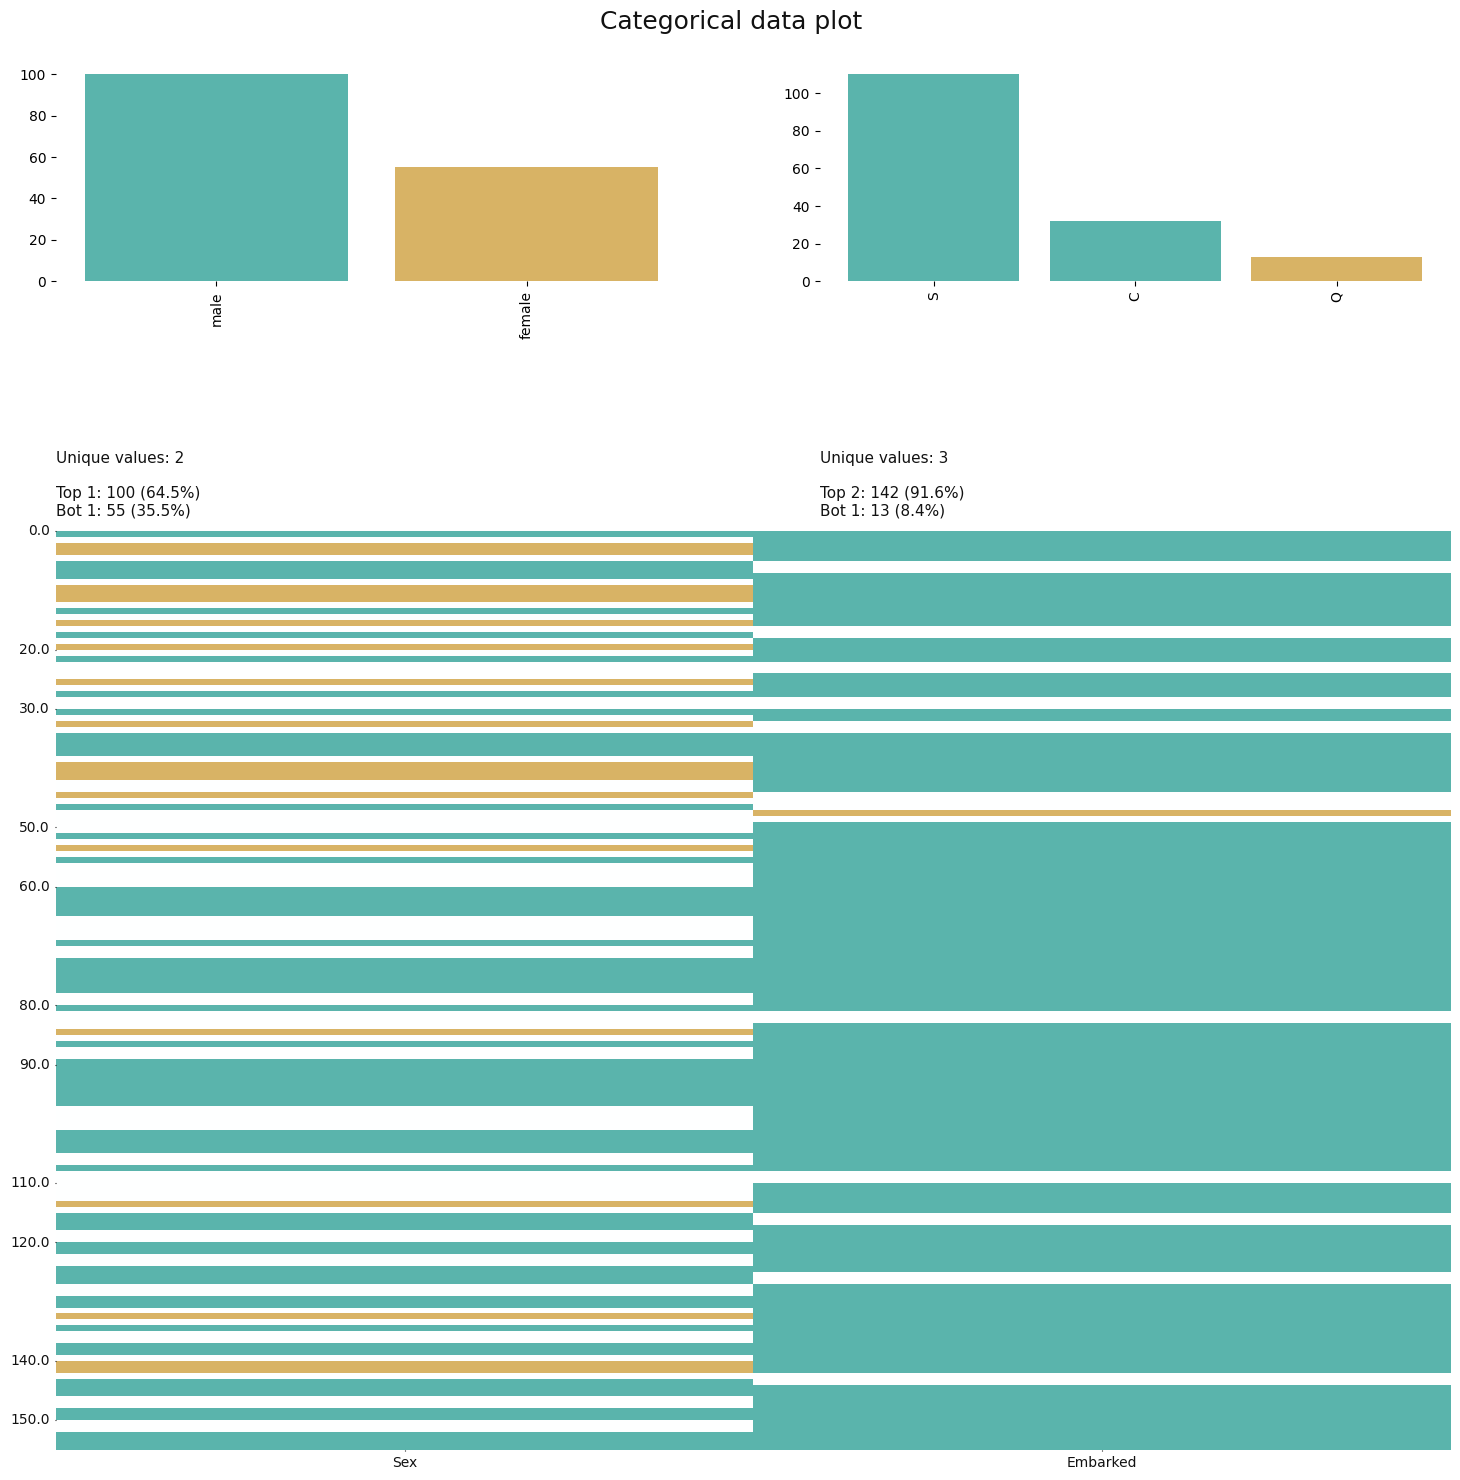

In [ ]:
klib.cat_plot(df, top=4, bottom=4)

italicised text### Transform Categorical Features

In [69]:
# First, create dummy columns from the Embarked and Sex columns
EmbarkedColumnDummy = pd.get_dummies(df['Embarked'])
SexColumnDummy = pd.get_dummies(df['Sex'])

df = pd.concat((df, EmbarkedColumnDummy, SexColumnDummy), axis=1).drop(['Sex','Embarked'],axis=1)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,0,3,22.00,1,0,7.2500,0,0,1,0,1
1,1,1,38.00,1,0,71.2833,1,0,0,1,0
2,1,3,26.00,0,0,7.9250,0,0,1,1,0
3,1,1,35.00,1,0,53.1000,0,0,1,1,0
4,0,3,35.00,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
151,1,1,22.00,1,0,66.6000,0,0,1,1,0
152,0,3,55.50,0,0,8.0500,0,0,1,0,1
153,0,3,40.50,0,2,14.5000,0,0,1,0,1
154,0,3,45.75,0,0,7.3125,0,0,1,0,1


### Separate the Features and the Classes

We would separate the features (X) and the classes (y). The classes is the target variable we want to predict. In this case, it is the ‘Survived’ column

In [ ]:
## Move target variable to the end of the dataframe
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S',
       'female', 'male'],
      dtype='object')

In [70]:
df = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'C', 'Q', 'S', 'female', 'male','Survived']]

In [71]:
X_ = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [72]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
standardized_data = sc.fit_transform(X_)

X = standardized_data

In [73]:
X

array([[ 0.72126302, -0.43309291,  0.36077699, ...,  0.63960215,
        -0.74161985,  0.74161985],
       [-1.81954989,  0.67974892,  0.36077699, ..., -1.56347192,
         1.34839972, -1.34839972],
       [ 0.72126302, -0.15488245, -0.58702697, ...,  0.63960215,
         1.34839972, -1.34839972],
       ...,
       [ 0.72126302,  0.85363045, -0.58702697, ...,  0.63960215,
        -0.74161985,  0.74161985],
       [ 0.72126302,  1.21878168, -0.58702697, ...,  0.63960215,
        -0.74161985,  0.74161985],
       [-1.81954989,  1.58393291, -0.58702697, ..., -1.56347192,
        -0.74161985,  0.74161985]])

In [74]:
y.shape

(155,)

In [75]:
# Split the dataset into 70% Training and 30% Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=667
                                                    )

In [76]:
X_test.shape

(47, 10)

## Build Decision Trees Classifier

In [78]:
# Using simple Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=4)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.7446808510638298

## Build Random Forest Classifier

In [79]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=200)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.7659574468085106

Perform Classification Using Gradient Boosting Classifier. This classifier is available in the ensemble module which we already imported. So we don’t need to import anything

## Build Gradient Boosting Classifier

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
gb_clf.score(X_test, y_test)

0.723404255319149

## Build Logistic Regression Classifier

In [81]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test, y_test)

0.723404255319149

## Build Naive Bayes Classifier

In [83]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train,y_train)
nb_clf.score(X_test, y_test)

0.6170212765957447

## Build K-Nearest Neighbor Classifier

In [84]:
## Build a K-Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(X_train,y_train)
knn_clf.score(X_test, y_test)

0.7659574468085106

## Build Support Vector Machine Classifier

In [85]:
from sklearn.svm import SVC

svm_clf = SVC(probability=True)
svm_clf.fit(X_train,y_train)
svm_clf.score(X_test, y_test)

0.723404255319149

## Build XGB Classifier

In [86]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train,y_train)
xgb_clf.score(X_test, y_test)

0.7446808510638298

## Make All-in-one shot!

In [87]:
classifiers = [DecisionTreeClassifier(max_depth=4),
               RandomForestClassifier(n_estimators=200,random_state=667),
               GradientBoostingClassifier(),
               GradientBoostingClassifier(n_estimators=50),
               LogisticRegression(max_iter=1000),
               GaussianNB(),
               KNeighborsClassifier(n_neighbors=2),
               SVC(probability=True,kernel='rbf'),
               XGBClassifier()
               ]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=667
                                                    )
for cls in classifiers:
    cls.fit(X_train, y_train)
    cls.predict(X_test)

### ConfusionMatrix

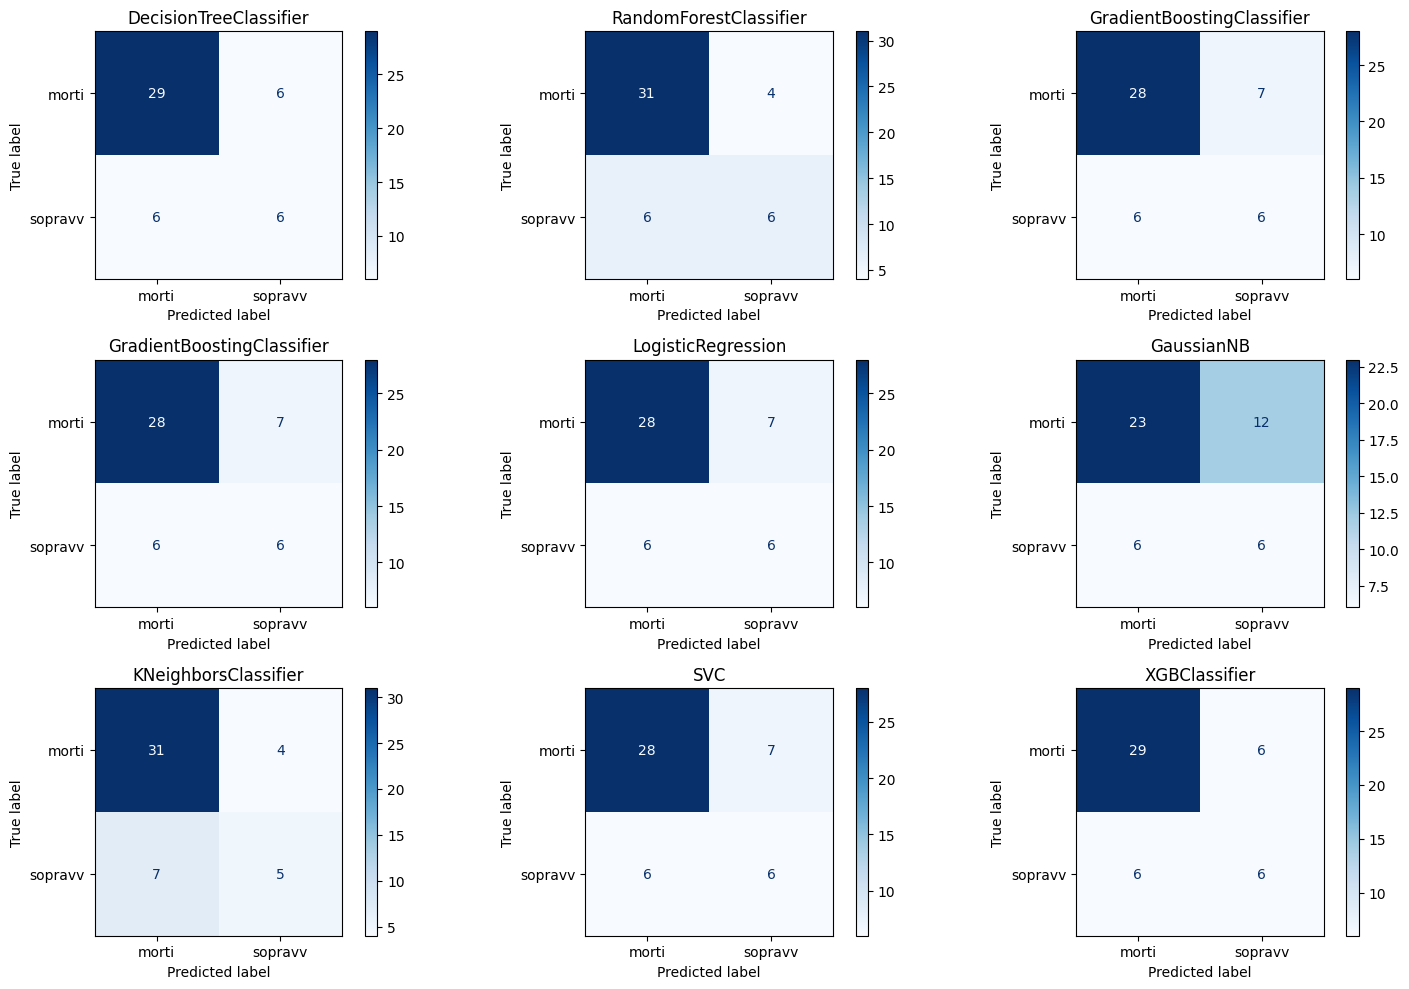

In [89]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))

for cls, ax in zip(classifiers, axes.flatten()):
    ConfusionMatrixDisplay.from_estimator(cls,
                                            X_test,
                                            y_test,
                                            ax=ax,
                                            cmap='Blues',
                                            display_labels=['morti','sopravv'])
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()
#plt.show()

In [90]:
from sklearn.metrics import classification_report

for cls, ax in zip(classifiers, axes.flatten()):
    print(cls)
    print(classification_report(y_test,cls.predict(X_test)))

DecisionTreeClassifier(max_depth=4)
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        35
           1       0.50      0.50      0.50        12

    accuracy                           0.74        47
   macro avg       0.66      0.66      0.66        47
weighted avg       0.74      0.74      0.74        47

RandomForestClassifier(n_estimators=200, random_state=667)
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        35
           1       0.60      0.50      0.55        12

    accuracy                           0.79        47
   macro avg       0.72      0.69      0.70        47
weighted avg       0.78      0.79      0.78        47

GradientBoostingClassifier()
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        35
           1       0.46      0.50      0.48        12

    accuracy                           0.72        47
   m

## All in one ROC-Curve

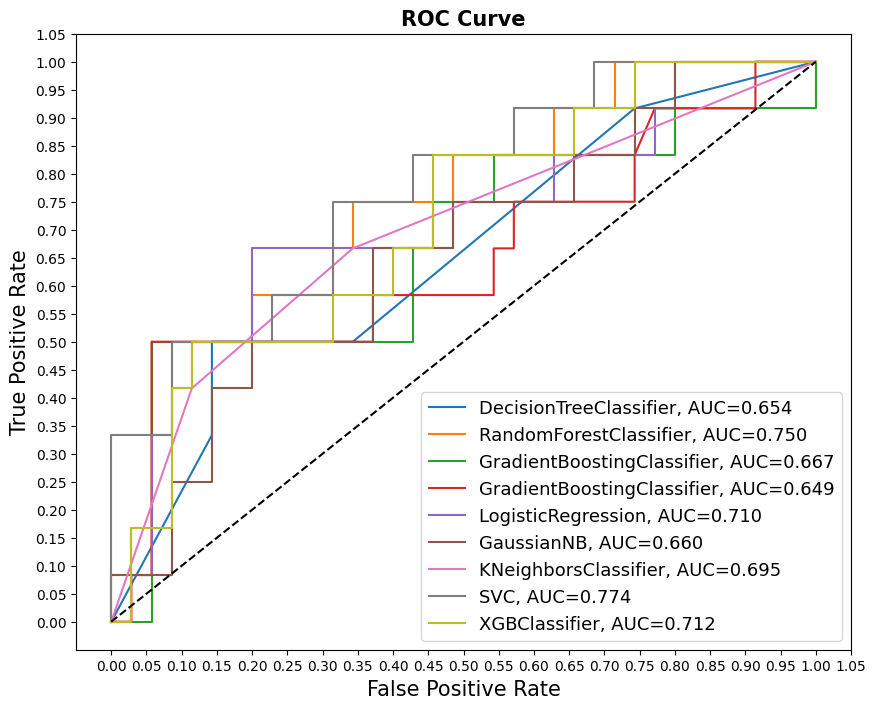

In [91]:
from sklearn.metrics import roc_curve, roc_auc_score

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[::,1]

    fpr, tpr, _ = roc_curve(y_test,  y_proba)
    auc = roc_auc_score(y_test, y_proba)

    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

# Plot the ROC curves for all classifiers
fig = plt.figure(figsize=(10,8))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(result_table.loc[i]['classifiers'], result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.05))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.05))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

## Fine Tune RandomForest with CrossValidation and GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search
param_grid = {
                'bootstrap': [True],
                'max_depth': [80, 90, 100, 110],
                'max_features': [2, 3],
                'min_samples_leaf': [3, 4, 5],
                'min_samples_split': [8, 10, 12],
                'n_estimators': [100, 200, 300, 1000]
            }

rf = RandomForestClassifier(random_state=667)
grid_search_rf = GridSearchCV(estimator = rf,
                            param_grid = param_grid,
                            cv = 5,
                            n_jobs = -1,
                            verbose = 2
                            )

 1 * 4 * 2 * 3 * 3 * 4 = 288 combinations of settings

 288*5 =1440 fit

In [ ]:
# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)
grid_search_rf.best_params_

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [ ]:
from sklearn.metrics import accuracy_score

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    print('Model Performance')
    print(f'Accuracy score: {acc:0.2f} %')
    return  round(acc,2)

best_grid = grid_search_rf.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)
grid_accuracy

Model Performance
Accuracy score: 0.77 %


0.77

Text(0.5, 1.0, 'Visualizing Important Features')

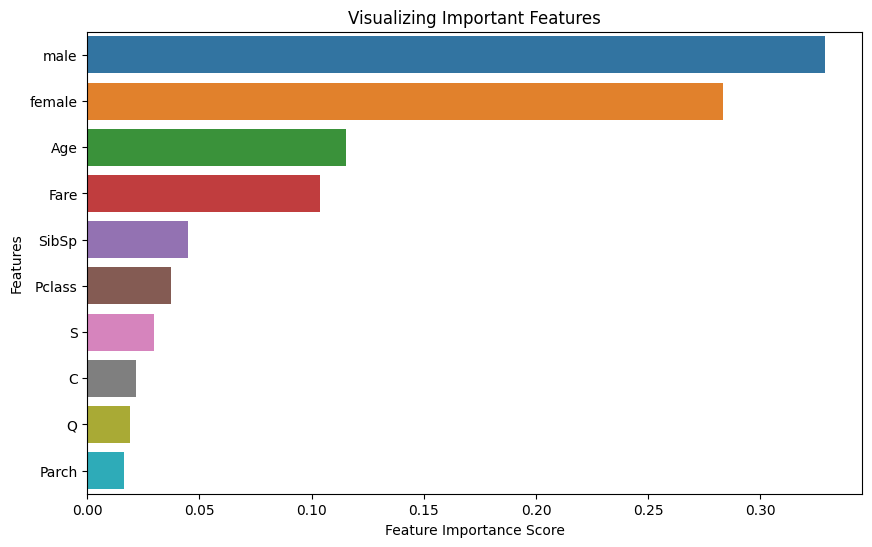

In [ ]:
X = df.iloc[:,:-1]
feature_imp = pd.Series(best_grid.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")